In [1]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

In [2]:
# Time horizon
T = 3

# Number of control inputs
nu = 2

# Transition matrices
A = np.array(
    [[0.75, -1],
     [ 1, 0.75]]
    )
B = np.array(
    [[  1, 0.5],
     [0.5, 0.5]]
    )

In [3]:
# Cost function
def l(x,u=0):
    if(len(x.shape)>1):
        return 0.5*np.sum(np.square(x), axis=-2)
    return 0.5*np.sum(np.square(x))
    

        
def q(x):
    return l(x)

In [4]:
def DP(t,xt,T=T):
    if (t==T):
        return None, q(xt)    
    else:
        qq = Q(t,xt,T=T)
#         print("t: {}\tQ: {}".format(t,qq))
        v = np.min(qq,axis=0)
        pi = np.argmin(qq,axis=0)
        return pi, v
    
def Q(t,xt,T=T):
    try:
        next_x = np.stack([np.matmul(A,xt), np.matmul(B,xt)])
    except ValueError:
        xt = np.expand_dims(xt,-1)
        next_x = np.stack([np.matmul(A,xt), np.matmul(B,xt)])
    return V(t+1,next_x,T=T) + np.expand_dims(l(xt),0) 


def V(t,xt,T=T):
    _, v = DP(t,xt,T=T)
    return v

def PI(t,xt,T=T):
    pi, _ = DP(t,xt,T=T)
    return pi

In [5]:
# OPTIONS x FEATURES x TIMEPOINTS
# State space
N = 11  # Number of states to sample
d = 2  # Dimensionality of state
Xmax = 2
Xmin = -2
X = np.transpose(np.array([x for x in it.product(np.linspace(Xmin, Xmax, N),np.linspace(Xmin, Xmax, N))]))


In [6]:
pi, v = DP(1,X)

In [7]:
pi

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [8]:
qq = Q(2,X)
[print(qq[:,i]) for i in range(N**2)];

[10.25 10.5 ]
[8.405 8.82 ]
[6.97 7.38]
[5.945 6.18 ]
[5.33 5.22]
[5.125 4.5  ]
[5.33 4.02]
[5.945 3.78 ]
[6.97 3.78]
[8.405 4.02 ]
[10.25  4.5 ]
[8.405 8.28 ]
[6.56 6.72]
[5.125 5.4  ]
[4.1  4.32]
[3.485 3.48 ]
[3.28 2.88]
[3.485 2.52 ]
[4.1 2.4]
[5.125 2.52 ]
[6.56 2.88]
[8.405 3.48 ]
[6.97 6.42]
[5.125 4.98 ]
[3.69 3.78]
[2.665 2.82 ]
[2.05 2.1 ]
[1.845 1.62 ]
[2.05 1.38]
[2.665 1.38 ]
[3.69 1.62]
[5.125 2.1  ]
[6.97 2.82]
[5.945 4.92 ]
[4.1 3.6]
[2.665 2.52 ]
[1.64 1.68]
[1.025 1.08 ]
[0.82 0.72]
[1.025 0.6  ]
[1.64 0.72]
[2.665 1.08 ]
[4.1  1.68]
[5.945 2.52 ]
[5.33 3.78]
[3.485 2.58 ]
[2.05 1.62]
[1.025 0.9  ]
[0.41 0.42]
[0.205 0.18 ]
[0.41 0.18]
[1.025 0.42 ]
[2.05 0.9 ]
[3.485 1.62 ]
[5.33 2.58]
[5.125 3.   ]
[3.28 1.92]
[1.845 1.08 ]
[0.82 0.48]
[0.205 0.12 ]
[0. 0.]
[0.205 0.12 ]
[0.82 0.48]
[1.845 1.08 ]
[3.28 1.92]
[5.125 3.   ]
[5.33 2.58]
[3.485 1.62 ]
[2.05 0.9 ]
[1.025 0.42 ]
[0.41 0.18]
[0.205 0.18 ]
[0.41 0.42]
[1.025 0.9  ]
[2.05 1.62]
[3.485 2.58 ]
[5.33 3.78]
[5.9

In [9]:
t = 0
Nt = (T-t)
S = [A,B]
I = [0,1]
IN = [I]*Nt
indices = [i for i in it.product(*IN)]
si = np.reshape(np.array(indices), [2]*Nt+[Nt])
SN = np.reshape(np.array([ [S[i] for i in I] for I in indices]), [2]*Nt + [Nt] + list(A.shape)) 
# Index SN with (i,j,...k,t,A_i,A_j)
#  i.e. (0,0,0,0,4) gives the transition matrix at t=4 if we choose path AAAA

QQ = np.zeros((2**Nt,X.shape[1]))
# I is sets of indices, e.g. (0,0,0,1); (1,0,1,0)
# i is each index of I, e.g. 0, 1
for ii,I in enumerate(indices):
    transitions = [S[i] for i in I]
    xp = X
    # Walk through timesteps
    for Ct in transitions:
        xp = np.matmul(Ct,xp)
        QQ[ii] += l(xp)
QQ += l(X)

In [10]:
v = np.min(QQ, axis=0)
pi = np.argmin(QQ, axis=0)

In [11]:
[print(QQ[:,i]) for i in range(N)];

[35.27441406 24.35351562 15.13476562 15.1015625  36.52539062 26.6015625
 39.0078125  40.6875    ]
[28.92501953 18.78945313 14.36601563 14.481875   31.00164063 22.771875
 33.138125   34.57125   ]
[23.98660156 14.64882812 14.17382812 14.4353125  26.03820312 19.3453125
 27.8415625  29.0475    ]
[20.45916016 11.93164062 14.55820312 14.961875   21.63507812 16.321875
 23.118125   24.11625   ]
[18.34269531 10.63789063 15.51914063 16.0615625  17.79226563 13.7015625
 18.9678125  19.7775    ]
[17.63720703 10.76757812 17.05664062 17.734375   14.50976562 11.484375
 15.390625   16.03125   ]
[18.34269531 12.32070313 19.17070313 19.9803125  11.78757812  9.6703125
 12.3865625  12.8775    ]
[20.45916016 15.29726563 21.86132812 22.799375    9.62570312  8.259375
  9.955625   10.31625   ]
[23.98660156 19.69726563 25.12851562 26.1915625   8.02414062  7.2515625
  8.0978125   8.3475    ]
[28.92501953 25.52070313 28.97226563 30.156875    6.98289062  6.646875
  6.813125    6.97125   ]
[35.27441406 32.76757812 

In [12]:
v = np.min(QQ, axis=0)
pi = np.argmin(QQ, axis=0)

pi_r, v_r = DP(t,X)


In [13]:
all(abs(v-v_r)<0.00001)

True

In [14]:
pi_0 = np.array([indices[p][0] for p in pi])

all(pi_r==pi_0)

True

In [15]:
v_r

array([15.1015625 , 14.36601563, 14.17382812, 11.93164062, 10.63789062,
       10.76757812,  9.6703125 ,  8.259375  ,  7.2515625 ,  6.646875  ,
        6.1015625 , 10.6765625 ,  9.665     ,  9.12890625,  8.391875  ,
        6.92984375,  6.89125   ,  5.9390625 ,  4.93125   ,  4.3265625 ,
        3.905     ,  3.8515625 ,  7.6703125 ,  6.266875  ,  5.4365625 ,
        5.10257812,  4.08320312,  3.87632812,  3.1265625 ,  2.521875  ,
        2.1965625 ,  2.228125  ,  2.8275    ,  6.0828125 ,  4.2875    ,
        3.0653125 ,  2.41625   ,  2.09796875,  1.7228125 ,  1.2328125 ,
        0.97625   ,  1.09125   ,  1.7825    ,  2.8453125 ,  5.9140625 ,
        3.726875  ,  2.1128125 ,  1.071875  ,  0.6040625 ,  0.43070312,
        0.2440625 ,  0.445625  ,  1.0640625 ,  2.071875  ,  3.4828125 ,
        5.0390625 ,  3.225     ,  1.8140625 ,  0.80625   ,  0.2015625 ,
        0.        ,  0.2015625 ,  0.80625   ,  1.8140625 ,  3.225     ,
        5.0390625 ,  3.4828125 ,  2.071875  ,  1.0640625 ,  0.44

In [16]:
v-v_r

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.77635684e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.77635684e-15, -8.88178420e-16,  0.00000000e+00,  1.77635684e-15,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.88178420e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.88178420e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [17]:

def get_X(N=100,Xmax=2, Xmin=-2, d=2):
    return np.transpose(np.array([x for x in it.product(np.linspace(Xmin, Xmax, N),np.linspace(Xmin, Xmax, N))]))
 

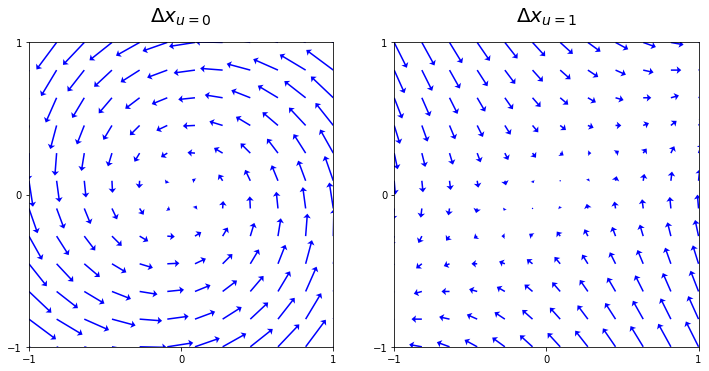

In [38]:
n = 12
X = get_X(N=n, Xmax=1, Xmin=-1)

S = [A,B]

fig, axs = plt.subplots(1,2, figsize=(12,6))

qq = 0
t=T-1

for i,C in enumerate(S):
    X1 = np.matmul(C,X)
    QQ = Q(t,X)[i]

    tmp = axs[i].quiver(*X, *(X1-X), color='blue', #QQ,
                  scale=12, headwidth=5, headlength=3, 
                  headaxislength=2.5, width=.005, 
                  minshaft=1, minlength=1)

    axs[i].axis([-1,1,-1,1])
    axs[i].set_aspect('equal', adjustable='box')
    axs[i].set_xticks([-1,0,1]) 
    axs[i].set_yticks([-1,0,1])
    
    axs[i].set_title(r'$\Delta x_{{u={}}}$'.format(i), fontsize=20, pad=20)
    plt.draw()

#     if np.max(QQ) > qq:
#         img = tmp
#         qq = np.max(QQ)
#         qqm = np.min(QQ)

# cbar = fig.colorbar(img, ax=axs, shrink=0.75, aspect=10)
# cbar.set_ticks([qqm,qq])
# cbar.set_ticklabels(['low Q(x,u)','high Q(x,u)'])


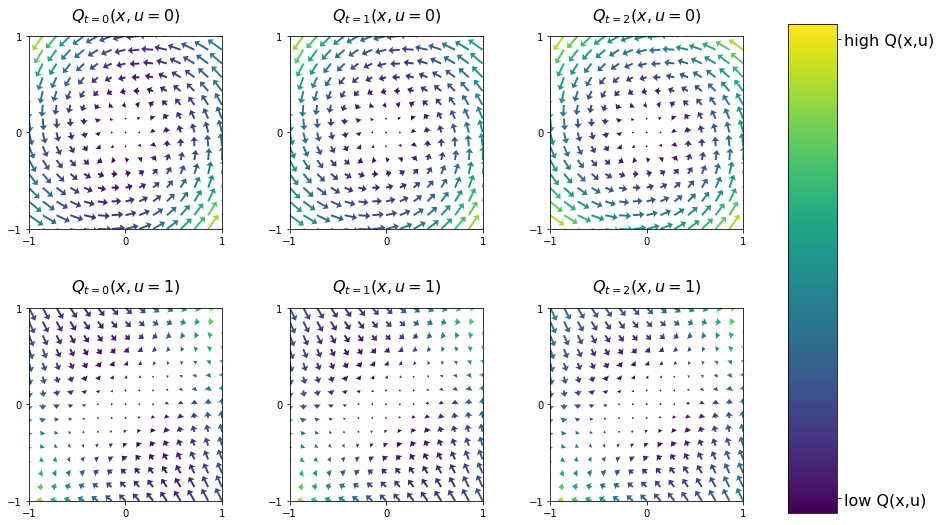

In [83]:
n = 15
X = get_X(N=n, Xmax=1, Xmin=-1)

S = [A,B]

fig, axs = plt.subplots(2,Nt, figsize=(16,9))

qq = 0

for t in range(Nt):
    for i,C in enumerate(S):
        X1 = np.matmul(C,X)


        QQ = Q(t,X)[i]

        tmp = axs[i,t].quiver(*X, *(X1-X), QQ,
                      scale=15, headwidth=4, headlength=2.5, 
                      headaxislength=2.25, width=.01, 
                      minshaft=1, minlength=1)

    #         tmp = axs[t,i].imshow(np.reshape(Q(t,X)[i], [15,-1]))
        axs[i,t].axis([-1,1,-1,1])
        axs[i,t].set_aspect('equal', adjustable='box')
        axs[i,t].set_xticks([-1,0,1]) 
        axs[i,t].set_yticks([-1,0,1])
        axs[i,t].set_title(r'$Q_{{t={}}}(x,u={})$'.format(t,i), fontsize=16, pad=16)
        plt.draw()

        if np.max(QQ) > qq:
            img = tmp
            qq = np.max(QQ)
            qqm = np.min(QQ)

plt.subplots_adjust(wspace=.35, hspace=.25)

cbar = fig.colorbar(img, ax=axs, shrink=1, aspect=10)
cbar.set_ticks([qqm+.25,qq-.25])
cbar.set_ticklabels(['low Q(x,u)','high Q(x,u)'])
cbar.ax.tick_params(labelsize=16)

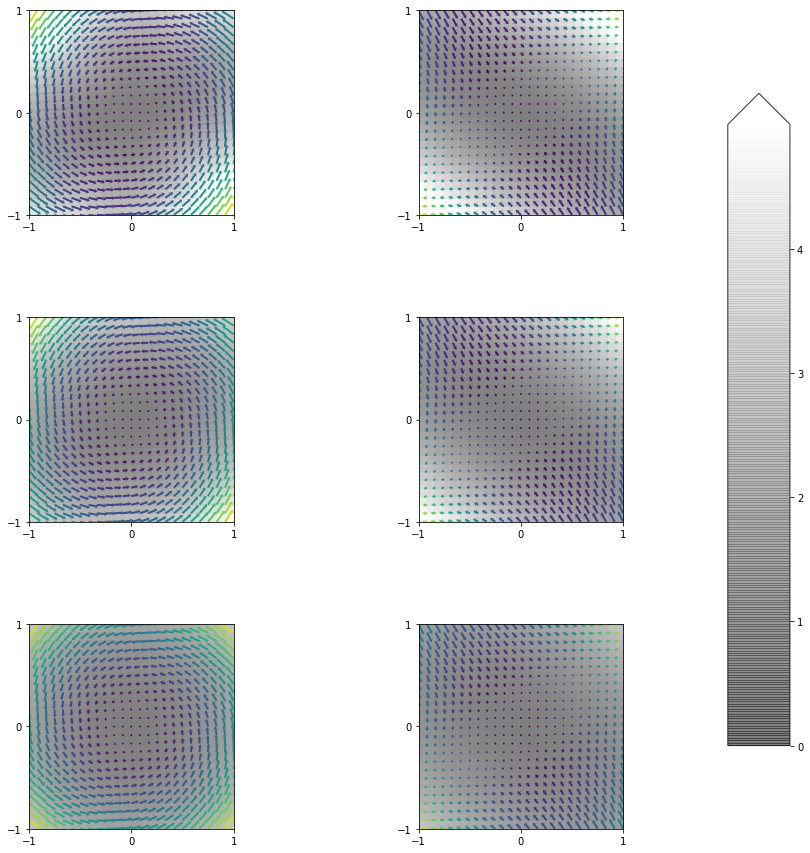

In [20]:
n = 25
X = get_X(N=n, Xmax=1, Xmin=-1)

S = [A,B]

fig, axs = plt.subplots(Nt,2, figsize=(16,16))

qq = 0

real_x = [-1,1]
real_y = [-1,1]

dx = (real_x[1]-real_x[0])/2.
dy = (real_y[1]-real_y[0])/2.
extent = [real_x[0]-dx, real_x[-1]+dx, real_y[0]-dy, real_y[-1]+dy]


extent=[-1, 1, -1, 1]



for t in range(Nt):
    for i,C in enumerate(S):
        X1 = np.matmul(C,X)
        
        QQ = np.reshape(Q(t,X,T=3)[i], (n,-1))
        
        tmp = axs[t,i].imshow(QQ, extent=extent, 
                              cmap=plt.cm.gray, interpolation='none', vmax=5,
                              origin='lower', aspect='equal', alpha=0.5)
        axs[t,i].quiver(*X, *(X1-X), QQ, cmap=plt.cm.viridis,
                      scale=20, headwidth=3, headlength=2, headaxislength=1, 
                      width=.01, minshaft=1, minlength=1, pivot='tail')
                     #,  edgecolor='white', linewidth=0.5)
        
        axs[t,i].set_xticks([-1,0,1]) 
        axs[t,i].set_yticks([-1,0,1])

#         tmp = axs[t,i].imshow(np.reshape(Q(t,X)[i], [15,-1]))
        #axs[t,i].axis([-1,1,-1,1])
        axs[t,i].set_aspect('equal', adjustable='box')
        plt.draw()
        
        if np.max(QQ) > qq:
            img = tmp
            qq = np.max(QQ)
        
#         print(QQ)
#         print()
#         print()
        
# plt.show()
#         im = ax.imshow(data, cmap=plt.cm.hot, interpolation='none')
# cbar = fig.colorbar(img, ax=axs, extend='max')
# cbar.cmap.set_over('green')

        
        
cbar = fig.colorbar(img, ax=axs, shrink=0.75, aspect=10, ticks=[0,1,2,3,4,8], extend='max')
# cbar.cmap.set_over('red')

In [21]:
qq

8.19189453125